**Cilj**: Predvideti ocene ucenika na kraju skolske godine, na osnovu datih atributa (socijalni status ucenika, roditelja, 
ocene ucenika...)

**Dataset**: https://archive.ics.uci.edu/ml/datasets/student+performance.

**Broj karakteristika:** 33 karakteristika

**Broj instanci:** 649 instanci

# Ucitavanje podataka


In [1]:
#biblioteke 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn         
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

missing_values = ["n/a", "na", "--","NaN","Na"]

dataset=pd.read_csv('student-por.csv',sep=';',na_values = missing_values)

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


# Preprocesiranje i deskriptivna statisika podataka


Potrebno je proveriti da li u skupu podataka postoje vrednosti koje nedostaju, odrediti kog su tipa podaco, proveriti outliere.


**Da li postoje vrednosti koje nedostaju**


In [3]:
print(dataset.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


**Tipovi podataka**

In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

**Deskriptivna statistika podataka**

In [5]:
print(dataset.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

## Mere centralne tendencije - mode i medijana

**Medijana**


In [6]:
print(dataset.median())

age           17.0
Medu           2.0
Fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
Dalc           1.0
Walc           2.0
health         4.0
absences       2.0
G1            11.0
G2            11.0
G3            12.0
dtype: float64


**Mode**

In [7]:
print(dataset.mode())

  school sex  age address famsize Pstatus  Medu  Fedu   Mjob   Fjob  reason  \
0     GP   F   17       U     GT3       T     2     2  other  other  course   

  guardian  traveltime  studytime  failures schoolsup famsup paid activities  \
0   mother           1          2         0        no    yes   no         no   

  nursery higher internet romantic  famrel  freetime  goout  Dalc  Walc  \
0     yes    yes      yes       no       4         3      3     1     1   

   health  absences  G1  G2  G3  
0       5         0  10  11  11  


## Mere sirenja

**Varijansa**

In [8]:
print(dataset.var())

age            1.483859
Medu           1.287208
Fedu           1.209848
traveltime     0.560492
studytime      0.688086
failures       0.351928
famrel         0.913395
freetime       1.104796
goout          1.382426
Dalc           0.855319
Walc           1.649632
health         2.091665
absences      21.536642
G1             7.536481
G2             8.489290
G3            10.437140
dtype: float64



Distribution of data



Text(0.5, 1.0, 'failures Distribution')

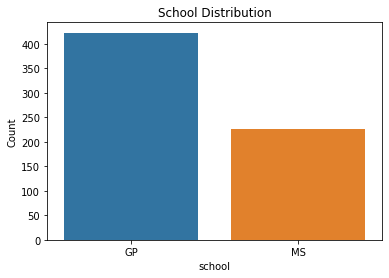

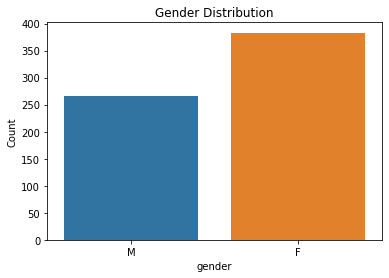

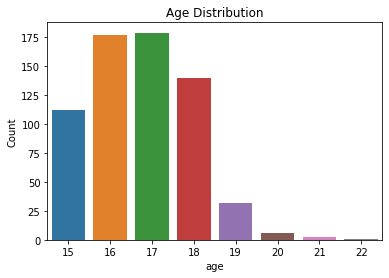

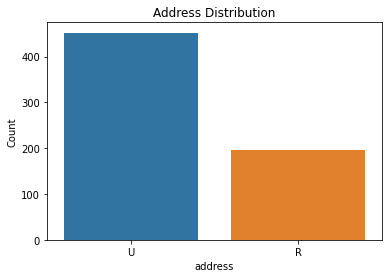

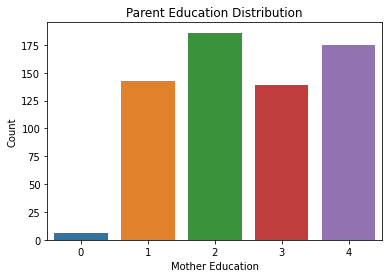

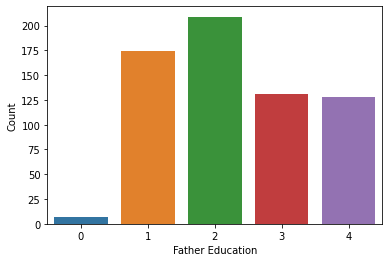

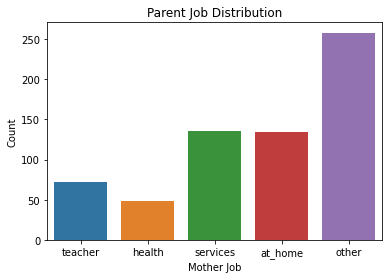

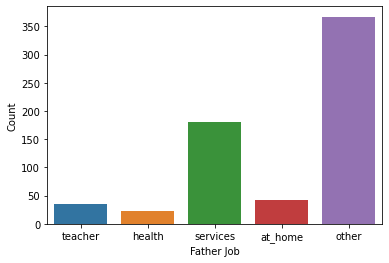

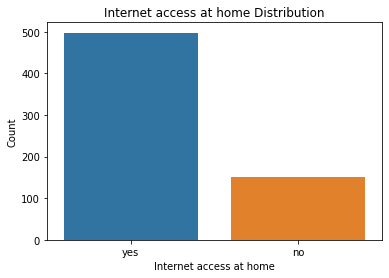

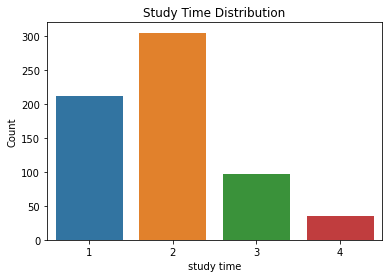

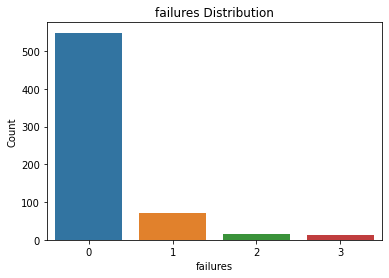

In [9]:
print('\nDistribution of data\n')
f, ax = plt.subplots()
figure = sns.countplot(x = 'school', data=dataset, order=['GP','MS'])
ax = ax.set(ylabel="Count", xlabel="school")
figure.grid(False)
plt.title('School Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'sex', data=dataset, order=['M','F'])
ax = ax.set(ylabel="Count", xlabel="gender")
figure.grid(False)
plt.title('Gender Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'age', data=dataset, order=[15,16,17,18,19,20,21,22])
ax = ax.set(ylabel="Count", xlabel="age")
plt.title('Age Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'address', data=dataset, order=['U','R'])
ax = ax.set(ylabel="Count", xlabel="address")
plt.title('Address Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Medu', data=dataset, order=[0,1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="Mother Education")
figure.grid(False)
plt.title('Parent Education Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Fedu', data=dataset, order=[0,1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="Father Education")
figure.grid(False)
f, ax = plt.subplots()
figure = sns.countplot(x = 'Mjob', data=dataset, order=['teacher','health','services','at_home','other'])
ax = ax.set(ylabel="Count", xlabel="Mother Job")
figure.grid(False)
plt.title('Parent Job Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'Fjob', data=dataset, order=['teacher','health','services','at_home','other'])
ax = ax.set(ylabel="Count", xlabel="Father Job")
figure.grid(False)
f, ax = plt.subplots()
figure = sns.countplot(x = 'internet', data=dataset, order=['yes','no'])
ax = ax.set(ylabel="Count", xlabel="Internet access at home")
figure.grid(False)
plt.title('Internet access at home Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'studytime', data=dataset, order=[1,2,3,4])
ax = ax.set(ylabel="Count", xlabel="study time")
figure.grid(False)
plt.title('Study Time Distribution')
f, ax = plt.subplots()
figure = sns.countplot(x = 'failures', data=dataset, order=[0,1,2,3])
ax = ax.set(ylabel="Count", xlabel="failures")
figure.grid(False)
plt.title('failures Distribution')

Text(0.5, 1.0, 'G3 Distribution')

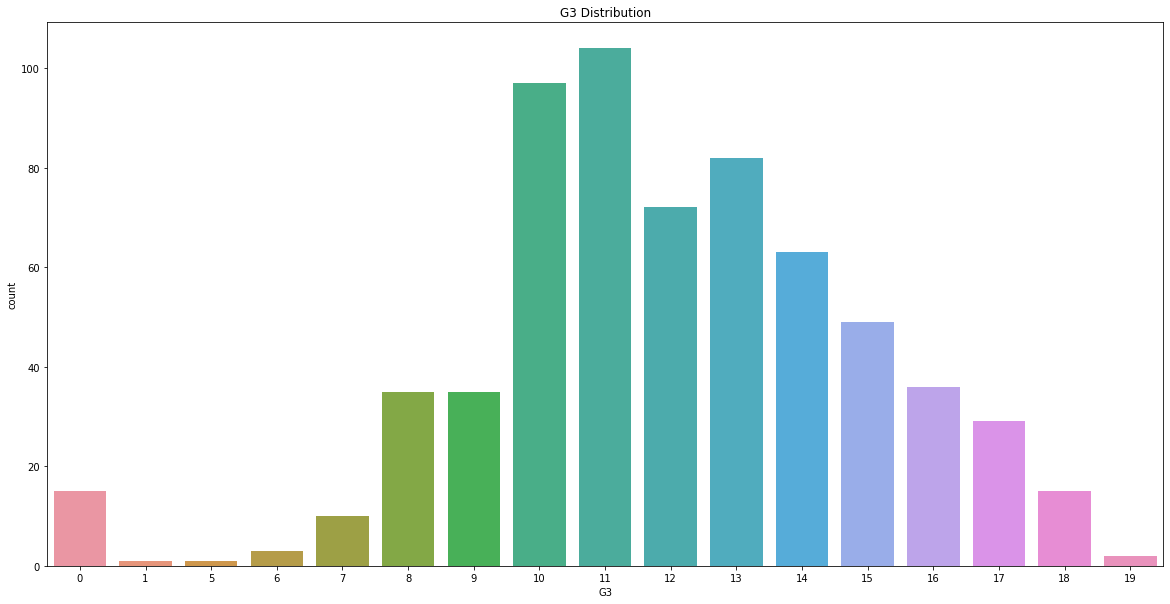

In [10]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='G3', data=dataset)
plt.title('G3 Distribution')

**Atributi G1 i G2  imaju jak uticaj na G3. Zbog toga necemo koristiti G1 i G2,
jer bismo uvek imali idealni kalasifikator, dok bi uticaj ostalih atributa bio mali**


Text(0.5, 1.0, 'Correlation Heatmap')

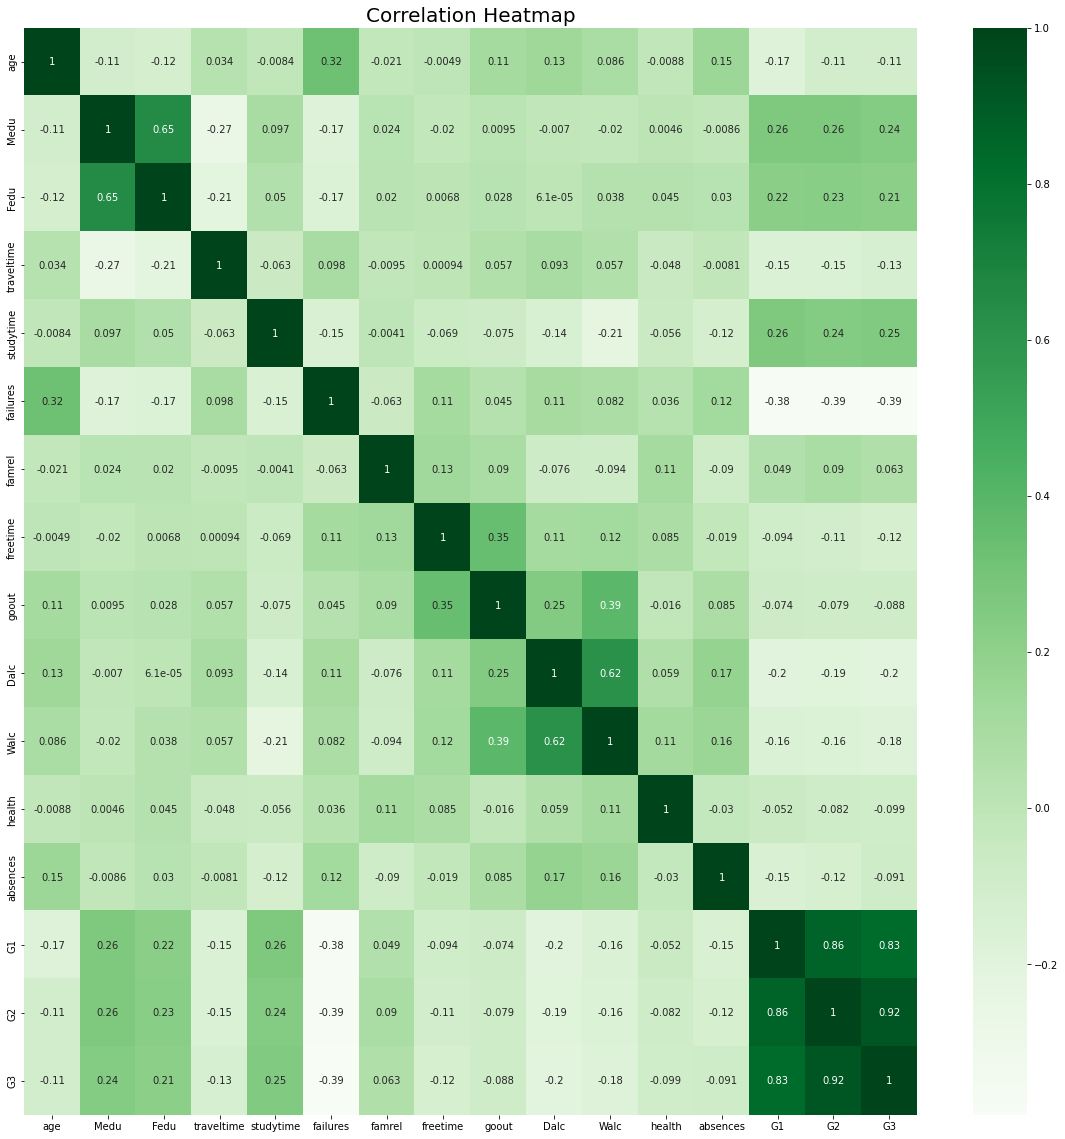

In [11]:
corr_matrix = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="Greens")
plt.title('Correlation Heatmap', fontsize=20)

## Transformisanje podataka 

** Atribut G3 sadrzi vrednosti od 0-20 i podeljen je u 5 klasa, koje predstavljaju ocene od 'A' do 'F'u zavisnosti od broja poena. 
Zatim su transformisan u numericke vrednosti: A-0, B-1, C-2, D-3,  F-4 **

Text(0.5, 1.0, 'G3 Distribution')

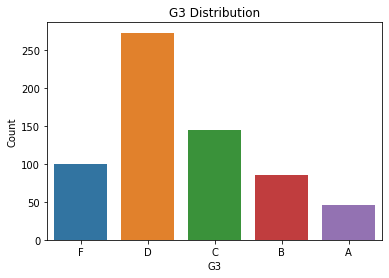

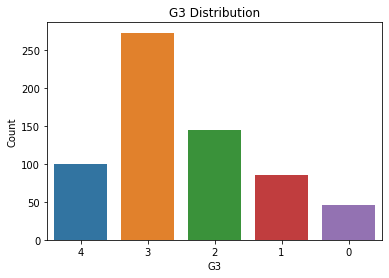

In [12]:
fiveclass_ranges = [-1,9,12,14,16,20]
five_names = ['F','D','C','B','A']

dataset['G3'] = pd.cut(
 np.array(dataset['G3']), bins=fiveclass_ranges,labels=five_names)
dataset['G2'] = pd.cut(
 np.array(dataset['G2']), bins=fiveclass_ranges,labels=five_names)
dataset['G1'] = pd.cut(
 np.array(dataset['G1']), bins=fiveclass_ranges,labels=five_names)


f, ax = plt.subplots()
figure = sns.countplot(x = 'G3', data=dataset, order=['F','D','C','B','A'])
ax = ax.set(ylabel="Count", xlabel="G3")
figure.grid(False)
plt.title('G3 Distribution')

le = preprocessing.LabelEncoder()
dataset.G3 = le.fit_transform(dataset.G3)
dataset.G2 = le.fit_transform(dataset.G2)
dataset.G1 = le.fit_transform(dataset.G1)

f, ax = plt.subplots()
figure = sns.countplot(x = 'G3', data=dataset, order=[4,3,2,1,0])
ax = ax.set(ylabel="Count", xlabel="G3"),
figure.grid(False)
plt.title('G3 Distribution')

**Podaci nisu balansirani i najmanje ima onih koji pripadaju klasama A i F, najvise onih koji pripaadaju klasi D.**

# Outliners

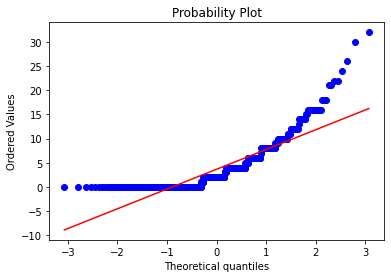

<AxesSubplot:xlabel='absences', ylabel='Density'>

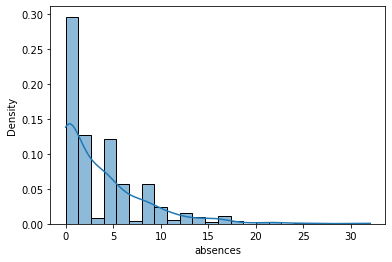

In [13]:
import pylab
import scipy.stats as stats
measurement=dataset['absences']
stats.probplot(measurement,dist='norm',plot=pylab)
pylab.show()
sns.histplot(x=dataset['absences'],stat="density",kde=True)

**Nemoguce je proveriti outlinre na ovaj nacin jer podaci nisu balansirani. Zato provravamo outlinere pomocu interkvantilnog opsega-IQR.** 

In [14]:
X=dataset.iloc[:, :-3].values
y=dataset.iloc[:, 32].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
from sklearn.compose import ColumnTransformer
categorical_columns = [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]
for col in categorical_columns:
    labelencoder = LabelEncoder()
    labelencoder.fit(X[:,col])
    X[:,col] = labelencoder.fit_transform(X[:,col])
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

features=[2,29]
for f in features:
    feature=X[:,f]
    print('Indeksi u kojima je moguce da se nadju outlineri')
    print(indicies_of_outliers(feature))

Indeksi u kojima je moguce da se nadju outlineri
(array([279], dtype=int64),)
Indeksi u kojima je moguce da se nadju outlineri
(array([ 40, 103, 150, 155, 161, 197, 206, 211, 212, 217, 230, 253, 254,
       256, 263, 311, 325, 326, 397, 405, 413], dtype=int64),)


**Proverom ovih indeksa vidimo da outlinera nema.**

In [15]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22])], remainder='passthrough')
X=np.array(columnTransformer.fit_transform(X),dtype=np.str)

X = np.asarray(X, dtype='float64')
y=np.asarray(y,dtype='int')
print('Standardna devijacija pre skaliranja podataka:  ', X.std())
scaler = StandardScaler()
X = scaler.fit_transform(X)
print('\n Standardna devijacija nakon skaliranja podataka:  ', X.std())

Standardna devijacija pre skaliranja podataka:   2.490088648152826

 Standardna devijacija nakon skaliranja podataka:   1.0


# Kreiranje modela

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Dummy clasificator

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(X_train, y_train)
score_dummy=dummy.score(X_test, y_test)
print("Score od dummy classifier: ",score_dummy)

Score od dummy classifier:  0.15897435897435896


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def get_prediction_report(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy: ", "%.2f" % (accuracy*100))
    
    class_names=[0,1,2,3,4]
    matrix = confusion_matrix(y_test, y_pred)
    dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
    sns.heatmap(dataframe, annot=True, cbar=None, cmap="Greens")
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()

    print("\nClassification report:\n")
    target_names = ['0', '1','2','3','4']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    return accuracy

# Logisticka regresija

**OneVSRest -ova logistička regresija sama po sebi binarni klasifikator, odredjujmo da li pripada toj klasi ili ostalim.**


Cross-validation score for Logistic regression - k-flods:  0.4388095238095238
Logistic regression one-vs-rest

Accuracy:  44.62


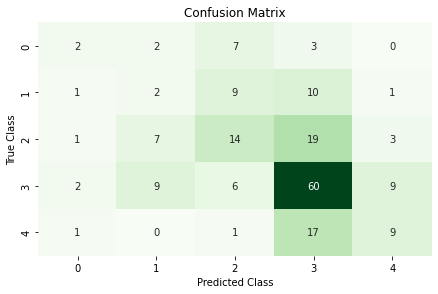


Classification report:

              precision    recall  f1-score   support

           0       0.29      0.14      0.19        14
           1       0.10      0.09      0.09        23
           2       0.38      0.32      0.35        44
           3       0.55      0.70      0.62        86
           4       0.41      0.32      0.36        28

    accuracy                           0.45       195
   macro avg       0.34      0.31      0.32       195
weighted avg       0.42      0.45      0.43       195



In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")

model = logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

standardizer=StandardScaler()
pipeline = make_pipeline(standardizer, logistic_regression)
kf = KFold(n_splits=100, shuffle=True, random_state=1)
cv_results = cross_val_score(pipeline,X,y,cv=kf,scoring="accuracy", n_jobs=-1)

print("Cross-validation score for Logistic regression - k-flods: ", cv_results.mean())
print("Logistic regression one-vs-rest\n")

accuracy_LR_ovr = get_prediction_report(y_test, y_pred)

**Ukoliko se koristi isti klasifikator, ali tako da se koristi parametar class_weight, koji kada je postavljen na 'balanced' smanjuje efekat neuravnoteženosti podataka dobijaju se sledeći rezultati:**

Logistic regression with balanced classes
Accuracy:  26.67


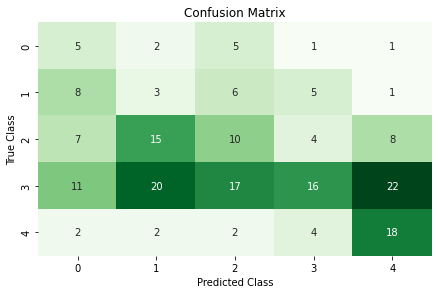


Classification report:

              precision    recall  f1-score   support

           0       0.15      0.36      0.21        14
           1       0.07      0.13      0.09        23
           2       0.25      0.23      0.24        44
           3       0.53      0.19      0.28        86
           4       0.36      0.64      0.46        28

    accuracy                           0.27       195
   macro avg       0.27      0.31      0.26       195
weighted avg       0.36      0.27      0.27       195



In [20]:
logistic_regression = LogisticRegression(random_state=0, class_weight='balanced')

model = logistic_regression.fit(X_train, y_train)
y_pred=logistic_regression.predict(X_test)

print("Logistic regression with balanced classes")

accuracy_LR_bal = get_prediction_report(y_test, y_pred)

### Multinominalna regresija


Logistic regression multinominal
Accuracy:  41.54


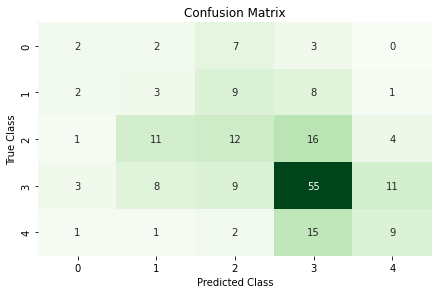


Classification report:

              precision    recall  f1-score   support

           0       0.22      0.14      0.17        14
           1       0.12      0.13      0.12        23
           2       0.31      0.27      0.29        44
           3       0.57      0.64      0.60        86
           4       0.36      0.32      0.34        28

    accuracy                           0.42       195
   macro avg       0.32      0.30      0.31       195
weighted avg       0.40      0.42      0.41       195



In [21]:
logistic_regression1 = LogisticRegression(random_state=0, multi_class="multinomial")

model = logistic_regression1.fit(X_train, y_train)
y_pred=logistic_regression1.predict(X_test)

print("Logistic regression multinominal")

accuracy_LR_multi = get_prediction_report(y_test, y_pred)

# RandomForest

Random forest
Cross-validation score - accuracy:
[0.31538462 0.39230769 0.36153846 0.36923077 0.33333333]
Accuracy:  36.92


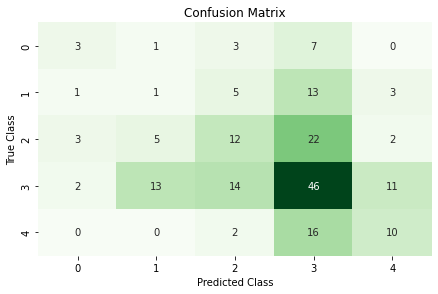


Classification report:

              precision    recall  f1-score   support

           0       0.33      0.21      0.26        14
           1       0.05      0.04      0.05        23
           2       0.33      0.27      0.30        44
           3       0.44      0.53      0.48        86
           4       0.38      0.36      0.37        28

    accuracy                           0.37       195
   macro avg       0.31      0.28      0.29       195
weighted avg       0.36      0.37      0.36       195



In [22]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(bootstrap=True,
criterion='gini', max_depth=None, max_features='auto',
 max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
 verbose=0, warm_start=False)

f = forest.fit(X_train, y_train)
y_pred=forest.predict(X_test)
print("Random forest")
print("Cross-validation score - accuracy:")
print(cross_val_score(forest, X, y, scoring='accuracy'))

accuracy_RFC = get_prediction_report(y_test, y_pred)

# RandomForest - balanced

Random forest-balanced
Cross-validation score - accuracy:
[0.26153846 0.40769231 0.3        0.41538462 0.31782946]
Accuracy:  41.54


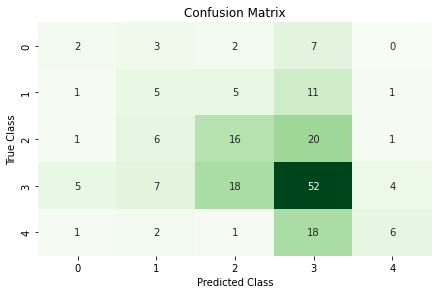


Classification report:

              precision    recall  f1-score   support

           0       0.20      0.14      0.17        14
           1       0.22      0.22      0.22        23
           2       0.38      0.36      0.37        44
           3       0.48      0.60      0.54        86
           4       0.50      0.21      0.30        28

    accuracy                           0.42       195
   macro avg       0.36      0.31      0.32       195
weighted avg       0.41      0.42      0.40       195



In [23]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(bootstrap=True,  class_weight='balanced',
criterion='gini', max_depth=None, max_features='auto',
 max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
 verbose=0, warm_start=False)

f = forest.fit(X_train, y_train)
y_pred=forest.predict(X_test)
print("Random forest-balanced")
print("Cross-validation score - accuracy:")
print(cross_val_score(forest, X, y, scoring='accuracy'))

accuracy_RFC = get_prediction_report(y_test, y_pred)

## AdaBoost

Ada boost classifier
Cross-validation score - accuracy:
[0.25384615 0.35384615 0.32307692 0.35384615 0.31782946]
Accuracy:  34.87


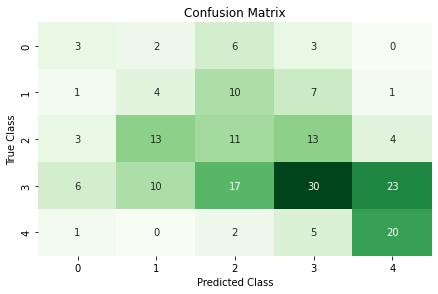


Classification report:

              precision    recall  f1-score   support

           0       0.21      0.21      0.21        14
           1       0.14      0.17      0.15        23
           2       0.24      0.25      0.24        44
           3       0.52      0.35      0.42        86
           4       0.42      0.71      0.53        28

    accuracy                           0.35       195
   macro avg       0.31      0.34      0.31       195
weighted avg       0.37      0.35      0.35       195



In [24]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=100)
model = abc.fit(X_train, y_train)
y_pred=abc.predict(X_test)
print("Ada boost classifier")
print("Cross-validation score - accuracy:")
print(cross_val_score(abc, X, y, scoring='accuracy'))

accuracy_boost = get_prediction_report(y_test, y_pred)

## Downsempling


In [25]:
print('Downsampling\n')
i_class0 = np.where(y == 0)[0]
i_class1 = np.where(y == 1)[0]
i_class2 = np.where(y == 2)[0]
i_class3 = np.where(y == 3)[0]
i_class4 = np.where(y == 4)[0]
n_class0 = len(i_class0)
n_class1 = len(i_class1)
n_class2 = len(i_class2)
n_class3 = len(i_class3)
n_class4 = len(i_class4)
print(' Class 0:' ,n_class0,'instances. \n Class 1:',n_class1,'instances. \n Class 2:',n_class2,'instances. \n Class 3:',n_class3,'instances. \n Class 4:',n_class4,'instances.')

Downsampling

 Class 0: 46 instances. 
 Class 1: 85 instances. 
 Class 2: 145 instances. 
 Class 3: 273 instances. 
 Class 4: 100 instances.


In [26]:
i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)
i_class2_downsampled = np.random.choice(i_class2, size=n_class0, replace=False)
i_class3_downsampled = np.random.choice(i_class3, size=n_class0, replace=False)
i_class4_downsampled = np.random.choice(i_class4, size=n_class0, replace=False)
new_data_y=np.hstack((y[i_class0],y[i_class1_downsampled], y[i_class2_downsampled], y[i_class3_downsampled],y[i_class4_downsampled]))
new_data_X=np.vstack((X[i_class0,:], X[i_class1_downsampled,:],X[i_class2_downsampled,:],X[i_class3_downsampled,:],X[i_class4_downsampled,:]))

In [27]:
X_trainN,X_testN,y_trainN,y_testN=train_test_split(new_data_X,new_data_y,test_size=0.3)

Random forest with downsampling
Accuracy:  30.43


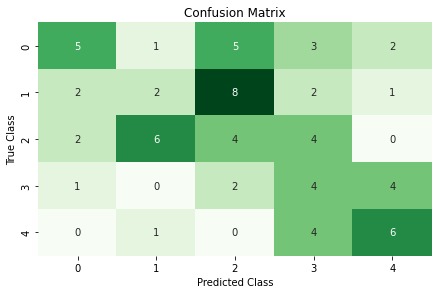


Classification report:

              precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.20      0.13      0.16        15
           2       0.21      0.25      0.23        16
           3       0.24      0.36      0.29        11
           4       0.46      0.55      0.50        11

    accuracy                           0.30        69
   macro avg       0.32      0.32      0.31        69
weighted avg       0.32      0.30      0.30        69



In [28]:
from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier()
f1 = forest1.fit(X_trainN, y_trainN)
y_predN=forest1.predict(X_testN)

print("Random forest with downsampling")

accuracy_RFC_down = get_prediction_report(y_testN, y_predN)

# Suport Vector 

Support vector machine rbf
Cross-validation score - accuracy
[0.37692308 0.39230769 0.38461538 0.43846154 0.41085271]
Accuracy:  47.69


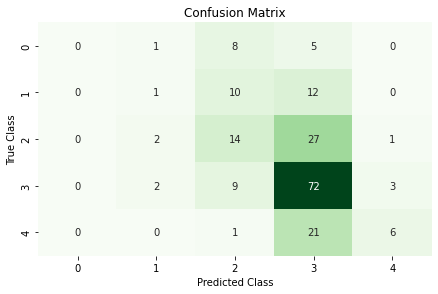


Classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.17      0.04      0.07        23
           2       0.33      0.32      0.33        44
           3       0.53      0.84      0.65        86
           4       0.60      0.21      0.32        28

    accuracy                           0.48       195
   macro avg       0.33      0.28      0.27       195
weighted avg       0.41      0.48      0.41       195



c:\users\ilija\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ilija\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ilija\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [29]:
from sklearn.svm import SVC

classifier= SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

print("Support vector machine rbf")
print("Cross-validation score - accuracy")
print(cross_val_score(classifier, X, y, scoring='accuracy'))

accuracy_svcRBF = get_prediction_report(y_test, y_pred)

# SuportVctor - balanced

Support vector machine linear:

Cross-validation score - accuracy:

[0.23846154 0.30769231 0.33846154 0.3        0.19379845]
Accuracy:  29.23


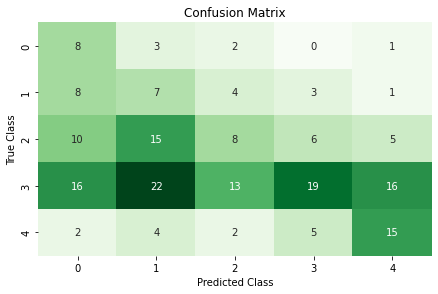


Classification report:

              precision    recall  f1-score   support

           0       0.18      0.57      0.28        14
           1       0.14      0.30      0.19        23
           2       0.28      0.18      0.22        44
           3       0.58      0.22      0.32        86
           4       0.39      0.54      0.45        28

    accuracy                           0.29       195
   macro avg       0.31      0.36      0.29       195
weighted avg       0.40      0.29      0.30       195



In [30]:
svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)
model = svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

print("Support vector machine linear:\n")
print("Cross-validation score - accuracy:\n")
print(cross_val_score(svc, X, y, scoring='accuracy'))

accuracy_svcL = get_prediction_report(y_test, y_pred)

# Tačnost svih isprobanih klasifikatora

Text(0.5, 0, 'Klasifikatori')

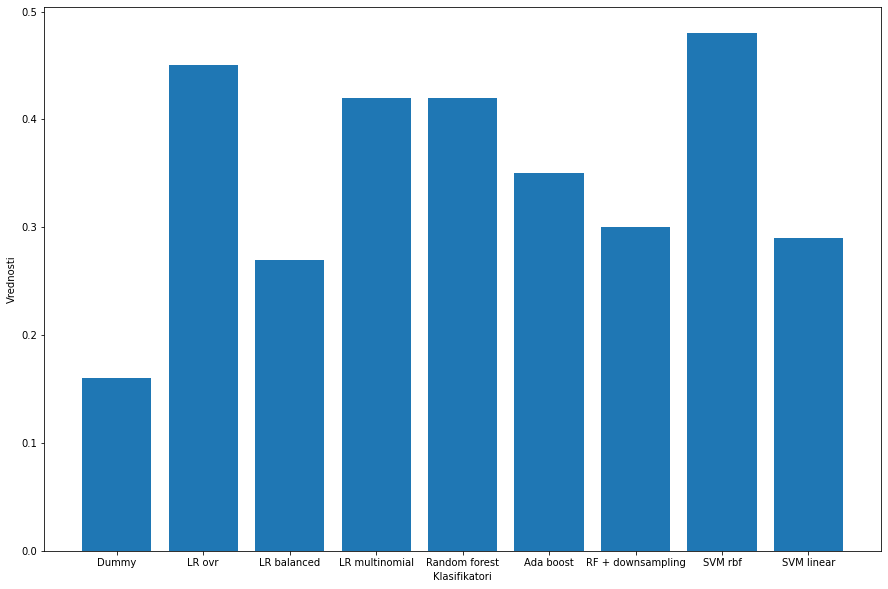

In [31]:
name =['Dummy', 'LR ovr','LR balanced', 'LR multinomial','Random forest','Ada boost','RF + downsampling','SVM rbf','SVM linear']
accuracy = (round(score_dummy, 2), round(accuracy_LR_ovr, 2),round(accuracy_LR_bal, 2),round(accuracy_LR_multi, 2),round(accuracy_RFC, 2),round(accuracy_boost, 2),round(accuracy_RFC_down, 2),round(accuracy_svcRBF, 2),round(accuracy_svcL, 2)) 
plt.figure(figsize=(15,10))
bars=plt.bar(name, accuracy)
plt.ylabel('Vrednosti')
plt.xlabel('Klasifikatori')


# Redukcija dimenzionalnosti

**Fature Selection - Rekurzivna eliminacija atributa**

In [32]:
import warnings
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import linear_model

warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

ols = linear_model.LinearRegression()

rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
rfecv.fit(X, y)
rfecv.transform(X)

print(' Number of best features:' , rfecv.n_features_)
print(' Which categories are best:' , rfecv.support_)


 Number of best features: 51
 Which categories are best: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True  True False False  True False  True  True]


In [33]:
column_indices=list(range(0, 56))

index_to_remove = [45, 46, 50, 51, 53]

new_a = np.delete(column_indices, index_to_remove)

X_new=X[:,column_indices]

In [34]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new,y,test_size=0.3)

Logistic regression multinominal with recursively eliminating features 

Accuracy:  41.54


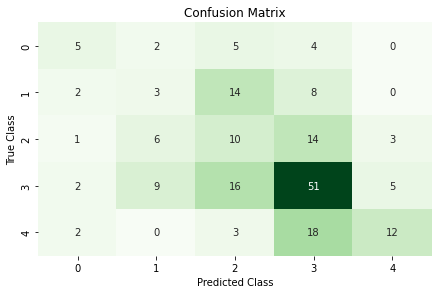


Classification report:

              precision    recall  f1-score   support

           0       0.42      0.31      0.36        16
           1       0.15      0.11      0.13        27
           2       0.21      0.29      0.24        34
           3       0.54      0.61      0.57        83
           4       0.60      0.34      0.44        35

    accuracy                           0.42       195
   macro avg       0.38      0.34      0.35       195
weighted avg       0.43      0.42      0.41       195



In [35]:
logistic_regression1 = LogisticRegression(random_state=0, multi_class="multinomial")

model = logistic_regression1.fit(X_train_new, y_train_new)
y_pred_new=logistic_regression1.predict(X_test_new)
accuracy_LR_multi_rfecv = accuracy_score(y_test_new, y_pred_new)
print("Logistic regression multinominal with recursively eliminating features \n")

accuracy_LR_multi_rfecv = get_prediction_report(y_test_new, y_pred_new)

Support vector machine rbf with recursively eliminating features 
Cross-validation score - accuracy
[0.37692308 0.39230769 0.38461538 0.43846154 0.41085271]
Accuracy:  42.05


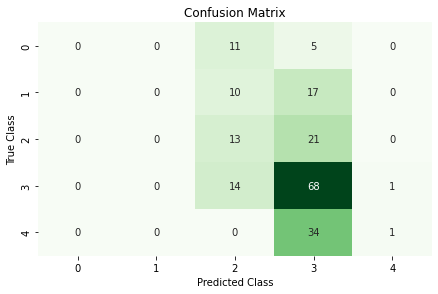


Classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        27
           2       0.27      0.38      0.32        34
           3       0.47      0.82      0.60        83
           4       0.50      0.03      0.05        35

    accuracy                           0.42       195
   macro avg       0.25      0.25      0.19       195
weighted avg       0.34      0.42      0.32       195



c:\users\ilija\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ilija\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ilija\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [49]:
classifier= SVC(kernel='rbf',random_state=0)
classifier.fit(X_train_new,y_train_new)
y_pred_new=classifier.predict(X_test_new)

print("Support vector machine rbf with recursively eliminating features ")
print("Cross-validation score - accuracy")
print(cross_val_score(classifier, X, y, scoring='accuracy'))

accuracy_svcRBF = get_prediction_report(y_test_new, y_pred_new)

### Redukcija dimenzionalnosti korišćenjem Feature Extraction - Uklanjanje atributa pomoću PCA

In [37]:
X_red=X
X_red.shape

(649, 56)

Variance  explained by all 56 principal components = 99.99999999999997

For each feature:
 [8.43513078e+00 5.99581548e+00 5.20825539e+00 4.67452293e+00
 4.39899134e+00 4.11131150e+00 3.97363721e+00 3.59690447e+00
 3.52746712e+00 3.32076051e+00 3.29589833e+00 3.17347015e+00
 3.11621186e+00 2.83509059e+00 2.72072039e+00 2.56781201e+00
 2.50726900e+00 2.45782311e+00 2.34364781e+00 2.08829867e+00
 1.97641731e+00 1.95764706e+00 1.87858082e+00 1.82750825e+00
 1.79384301e+00 1.73560216e+00 1.61387669e+00 1.49790482e+00
 1.46828384e+00 1.34236232e+00 1.29127524e+00 1.25193339e+00
 1.17788544e+00 1.12080678e+00 9.61337430e-01 9.20601907e-01
 8.46904769e-01 5.72359108e-01 4.15831023e-01 8.71763205e-30
 2.74732678e-30 2.54441645e-30 1.29101916e-30 9.53240306e-31
 6.82326588e-31 5.02310189e-31 2.78514601e-31 2.75451544e-31
 2.03656653e-31 2.02488587e-31 1.18159818e-31 9.01474078e-32
 8.35958862e-32 5.19441167e-32 1.99408902e-32 1.86176333e-32]

Variance  explained by the first principal component 

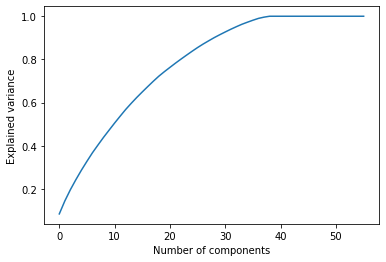

In [38]:
from sklearn.decomposition import PCA

pca=PCA(n_components=56, random_state=2000)
pca.fit(X_red)
X_pca=pca.transform(X_red)
print("Variance  explained by all 56 principal components =" , sum(pca.explained_variance_ratio_*100))
print("\nFor each feature:\n" ,pca.explained_variance_ratio_*100)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained variance')
plt.xlabel('Number of components')
print("\nVariance  explained by the first principal component =" , np.cumsum(pca.explained_variance_ratio_*100)[0])
print("Variance  explained by the first 2 principal component =" , np.cumsum(pca.explained_variance_ratio_*100)[1])
print("Variance  explained by the first 3 principal component =" , np.cumsum(pca.explained_variance_ratio_*100)[2])
print("Variance  explained by the first 10 principal component =" , np.cumsum(pca.explained_variance_ratio_*100)[9])
print("Variance  explained by the first 31 principal component =" , np.cumsum(pca.explained_variance_ratio_*100)[32])

(649, 33) compnents to preserve 95% of the variability in data


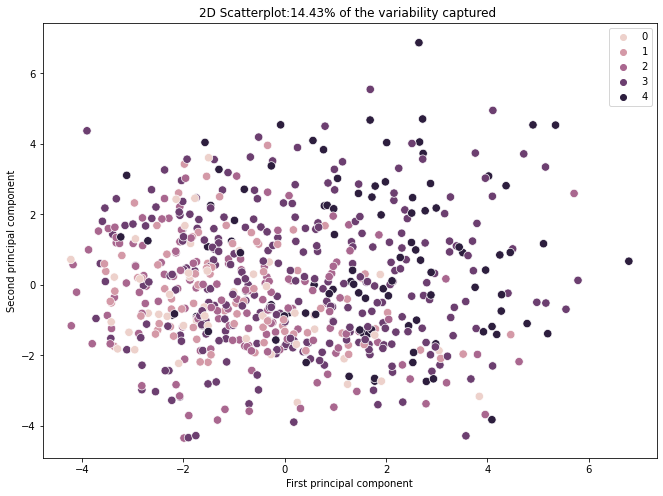

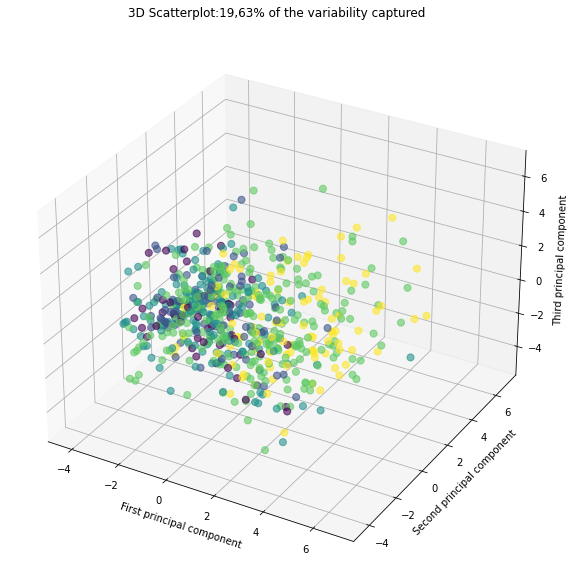

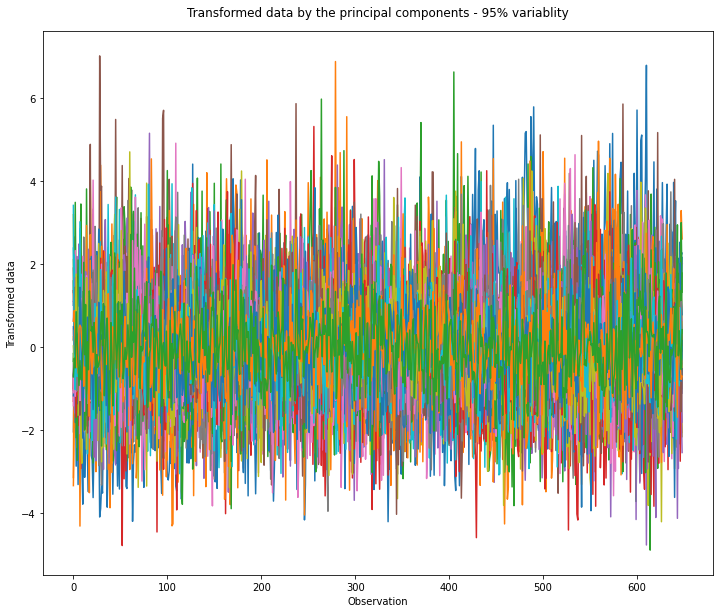

In [39]:
pca_2=PCA(n_components=2, random_state=2000)
pca_2.fit(X_red)
X_pca_2=pca_2.transform(X_red)
plt.figure(figsize=(11,8))
sns.scatterplot(x=X_pca_2[:,0],y=X_pca_2[:,1],s=70,hue=y)
plt.title('2D Scatterplot:14.43% of the variability captured ')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

pca_3=PCA(n_components=3, random_state=2000)
pca_3.fit(X_red)
X_pca_3=pca_3.transform(X_red)
fig=plt.figure(figsize=(12,10))
ax=plt.axes(projection='3d')
sctt=ax.scatter3D(X_pca_3[:,0],X_pca_3[:,1],X_pca_3[:,2],c=y,s=50,alpha=0.6)
sns.scatterplot
plt.title('3D Scatterplot:19,63% of the variability captured ',pad=15)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_zlabel('Third principal component')

pca_95=PCA(n_components=0.95, random_state=2000)
pca_95.fit(X_red)
X_pca_95=pca_95.transform(X_red)
plt.figure(figsize=(12,10))
plt.plot(X_pca_95)
plt.title('Transformed data by the principal components - 95% variablity',pad=15)
plt.xlabel('Observation')
plt.ylabel('Transformed data')
print("{} compnents to preserve 95% of the variability in data".format(X_pca_95.shape))

In [40]:
df=pd.DataFrame(X_pca_95, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC2','PC28','PC29','PC30','PC31','PC32','PC33'])
df['class']=y
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC2,PC28,PC29,PC30,PC31,PC32,PC33,class
0,-0.704242,-3.350503,1.590554,-1.315496,0.626048,1.898886,0.290938,-2.051975,3.187809,3.413306,1.003529,-3.153407,-0.162814,-1.003284,-0.709643,0.166587,-1.420232,-0.675272,2.104124,1.315748,-1.182228,0.249344,-0.348481,1.354070,1.093821,-1.044353,-1.107351,0.441476,0.021439,2.382941,0.479392,0.617289,-0.726359,3
1,0.471825,-1.647840,0.055485,2.487584,2.082911,-0.690802,1.036541,0.127006,-0.352755,-1.490213,1.615206,1.926725,-1.020137,0.011586,-1.502994,0.401447,0.978652,-0.541175,0.512550,2.216320,-0.727403,-0.130138,0.033127,0.472365,1.143789,0.460432,-0.172461,-0.436397,-0.453490,-0.104782,0.395754,0.875019,-0.275909,3
2,-0.168210,-1.940836,1.119766,-1.359691,2.660775,1.164658,-0.276444,0.519380,1.725558,-0.015470,-1.829524,-0.634063,3.486425,0.291030,-1.600957,-0.844911,2.322811,-0.117152,1.420975,1.086817,0.320657,0.101244,0.618806,-0.497673,1.669663,1.442987,-1.194443,-0.265878,0.551068,-1.034995,-0.173773,0.118793,-0.508967,3
3,-2.880459,-1.373477,-0.395803,1.178703,-2.008115,-1.536003,0.383198,-0.989882,-0.040973,0.449932,-0.745688,1.110518,0.541354,1.148294,1.218900,-0.206230,1.372410,-0.333412,-1.446108,-0.170397,1.181892,1.016732,-2.194571,-1.699431,-1.083911,-0.838607,0.329259,-0.947883,1.756028,0.839485,0.356886,-0.498182,0.846414,2
4,-0.648363,-2.431387,0.028287,0.519113,2.179215,0.255961,0.831559,-0.408306,-0.252488,-0.563772,-0.926804,0.019864,-2.743452,1.697461,1.527774,-0.224414,-0.539323,0.237967,-0.555364,0.388202,-1.377504,-1.163320,-0.103883,-0.827712,-0.878139,-0.350129,0.128631,-1.056427,0.419171,-0.714218,0.301194,0.086941,0.202455,2


In [41]:
X_train95,X_test95,y_train95,y_test95=train_test_split(X_pca_95,y,test_size=0.3)

Logistic regression one-vs-rest
Accuracy:  38.46


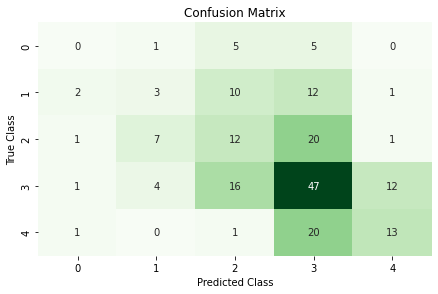


Classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.20      0.11      0.14        28
           2       0.27      0.29      0.28        41
           3       0.45      0.59      0.51        80
           4       0.48      0.37      0.42        35

    accuracy                           0.38       195
   macro avg       0.28      0.27      0.27       195
weighted avg       0.36      0.38      0.36       195



In [42]:
logistic_regression95_ovr = LogisticRegression(random_state=0, multi_class="ovr")
model = logistic_regression95_ovr.fit(X_train95, y_train95)
y_pred95=logistic_regression95_ovr.predict(X_test95)

print("Logistic regression one-vs-rest")
accuracy_LR_ovr95_ovr = get_prediction_report(y_test95, y_pred95)

Logistic regression multinominal
Accuracy:  39.49


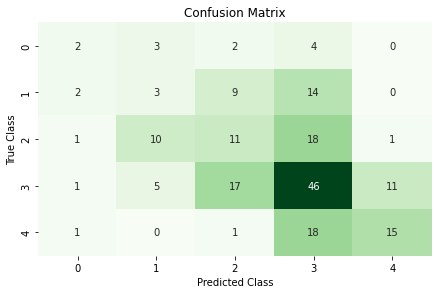


Classification report:

              precision    recall  f1-score   support

           0       0.29      0.18      0.22        11
           1       0.14      0.11      0.12        28
           2       0.28      0.27      0.27        41
           3       0.46      0.57      0.51        80
           4       0.56      0.43      0.48        35

    accuracy                           0.39       195
   macro avg       0.34      0.31      0.32       195
weighted avg       0.38      0.39      0.38       195



In [43]:
logistic_regression95_multi = LogisticRegression(random_state=0, multi_class="multinomial")
model = logistic_regression95_multi.fit(X_train95, y_train95)
y_pred95=logistic_regression95_multi.predict(X_test95)

print("Logistic regression multinominal")
accuracy_LR_ovr95_multi = get_prediction_report(y_test95, y_pred95)

Logistic regression balanced
Accuracy:  33.85


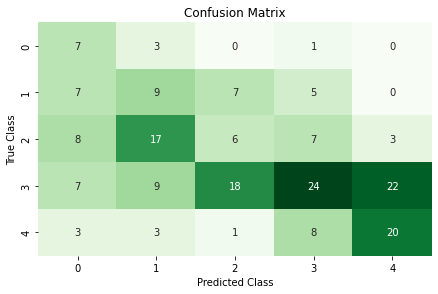


Classification report:

              precision    recall  f1-score   support

           0       0.22      0.64      0.33        11
           1       0.22      0.32      0.26        28
           2       0.19      0.15      0.16        41
           3       0.53      0.30      0.38        80
           4       0.44      0.57      0.50        35

    accuracy                           0.34       195
   macro avg       0.32      0.40      0.33       195
weighted avg       0.38      0.34      0.34       195



In [44]:
logistic_regression95_bal = LogisticRegression(random_state=0, class_weight='balanced')
model = logistic_regression95_bal.fit(X_train95, y_train95)
y_pred95=logistic_regression95_bal.predict(X_test95)

print("Logistic regression balanced")
accuracy_LR_ovr95_bal = get_prediction_report(y_test95, y_pred95)

In [45]:
new_data_y95=np.hstack((y[i_class0],y[i_class1_downsampled], y[i_class2_downsampled], y[i_class3_downsampled],y[i_class4_downsampled]))
new_data_X95=np.vstack((X_pca_95[i_class0,:], X_pca_95[i_class1_downsampled,:],X_pca_95[i_class2_downsampled,:],X_pca_95[i_class3_downsampled,:],X_pca_95[i_class4_downsampled,:]))

In [46]:
X_train_d95,X_test_d95,y_train_d95,y_test_d95=train_test_split(new_data_X95,new_data_y95,test_size=0.3)

Random forest with downsampling:

Accuracy:  30.43


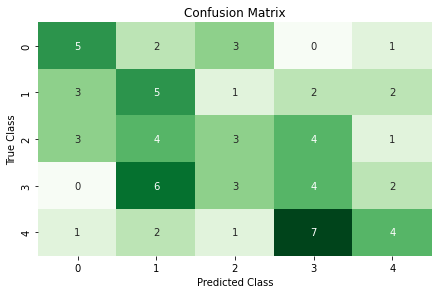


Classification report:

              precision    recall  f1-score   support

           0       0.42      0.45      0.43        11
           1       0.26      0.38      0.31        13
           2       0.27      0.20      0.23        15
           3       0.24      0.27      0.25        15
           4       0.40      0.27      0.32        15

    accuracy                           0.30        69
   macro avg       0.32      0.31      0.31        69
weighted avg       0.31      0.30      0.30        69



In [47]:
forest1 = RandomForestClassifier()
f1 = forest1.fit(X_train_d95, y_train_d95)
y_pred_d95=forest1.predict(X_test_d95)
print("Random forest with downsampling:\n")

accuracy_RFC_down_95 = get_prediction_report(y_test_d95, y_pred_d95)

Text(0.5, 0, 'Klasifikatori')

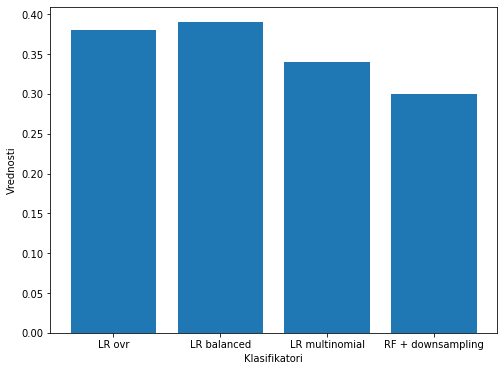

In [50]:
name =[ 'LR ovr','LR balanced', 'LR multinomial','RF + downsampling']
accuracy = (round(accuracy_LR_ovr95_ovr, 2),round(accuracy_LR_ovr95_multi, 2),round(accuracy_LR_ovr95_bal, 2),round(accuracy_RFC_down_95, 2)) 
plt.figure(figsize=(8, 6))
bars=plt.bar(name, accuracy)
plt.ylabel('Vrednosti')
plt.xlabel('Klasifikatori')

### Extra Trees klasifikator

**Koristi se Extra Trees klasifikator (Extremely Randomized Trees Classifier) kao vrsta ensamble tehnike učenja.
Ovaj tip klasifikatora podržava metode za računanje važnosti karakteristika (features).**

[0.01321108 0.01408552 0.01652976 0.01668329 0.01313751 0.01151539
 0.01768766 0.01702322 0.01054589 0.01056073 0.01327889 0.01091607
 0.01852503 0.01607639 0.01081569 0.00729649 0.00474482 0.01985487
 0.01796848 0.01065476 0.01950488 0.01910101 0.01150698 0.01703206
 0.01555006 0.01728243 0.00715683 0.0088293  0.00903493 0.01907474
 0.01920927 0.0066689  0.00665635 0.01820851 0.01846569 0.01516502
 0.01460026 0.0144332  0.01091753 0.01290139 0.01153273 0.01694104
 0.0171264  0.03211877 0.03032447 0.03113485 0.02654802 0.03260137
 0.02451811 0.0314644  0.03174412 0.03374663 0.02320904 0.03473916
 0.0341638  0.03567618]


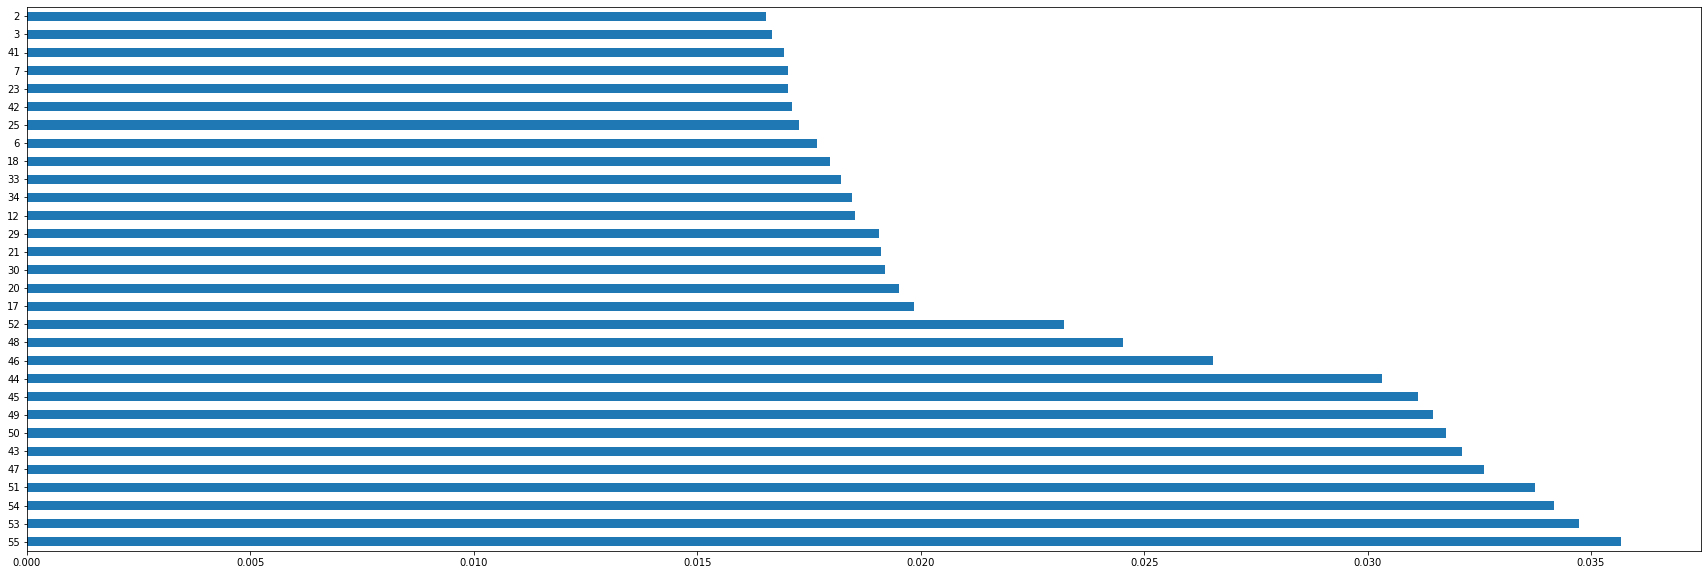

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(30).plot(kind='barh')
plt.rcParams["figure.figsize"] = [30,10]
plt.show()

In [54]:
column_indices=[55,53,50,54,49,51,43,45,47,44,48,46,52,20,21,29,17,12,33,30,18,34,41,43,7,2,3,23,6,25]
X_reduced=X[:,column_indices]

In [55]:
X_train_reduced,X_test_reduced,y_train_reduced,y_test_reduced=train_test_split(X_reduced,y,test_size=0.3)

Logistic regression one-vs-rest
Accuracy:  37.95


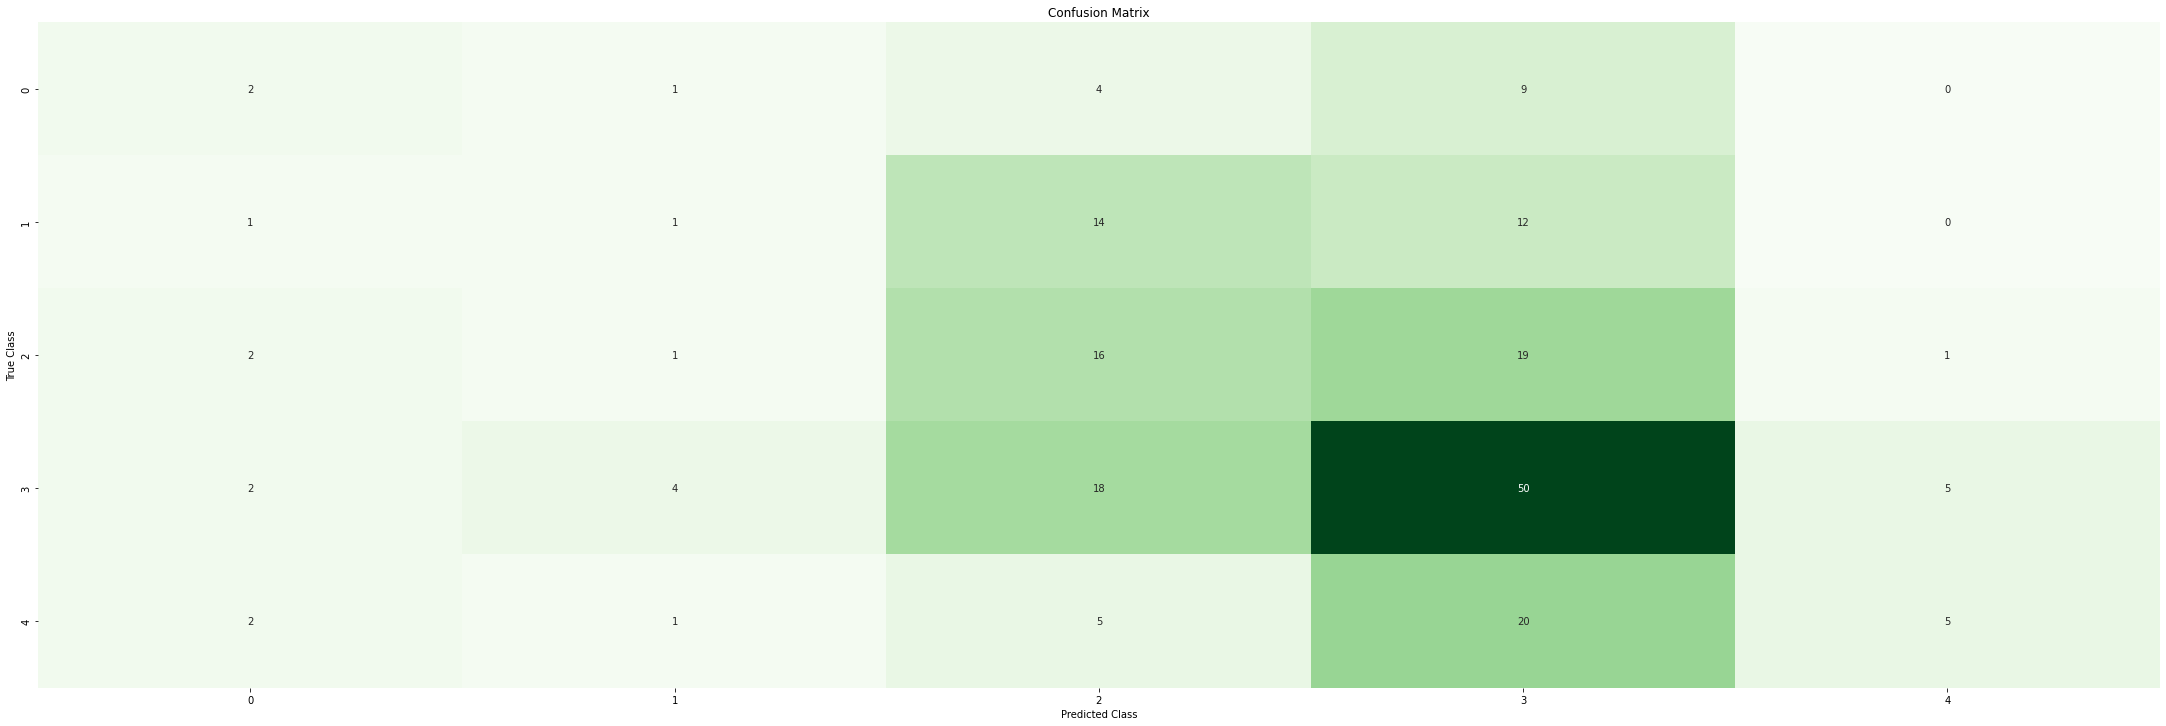


Classification report:

              precision    recall  f1-score   support

           0       0.22      0.12      0.16        16
           1       0.12      0.04      0.06        28
           2       0.28      0.41      0.33        39
           3       0.45      0.63      0.53        79
           4       0.45      0.15      0.23        33

    accuracy                           0.38       195
   macro avg       0.31      0.27      0.26       195
weighted avg       0.35      0.38      0.34       195

Logistic regression multinominal
Accuracy:  37.95


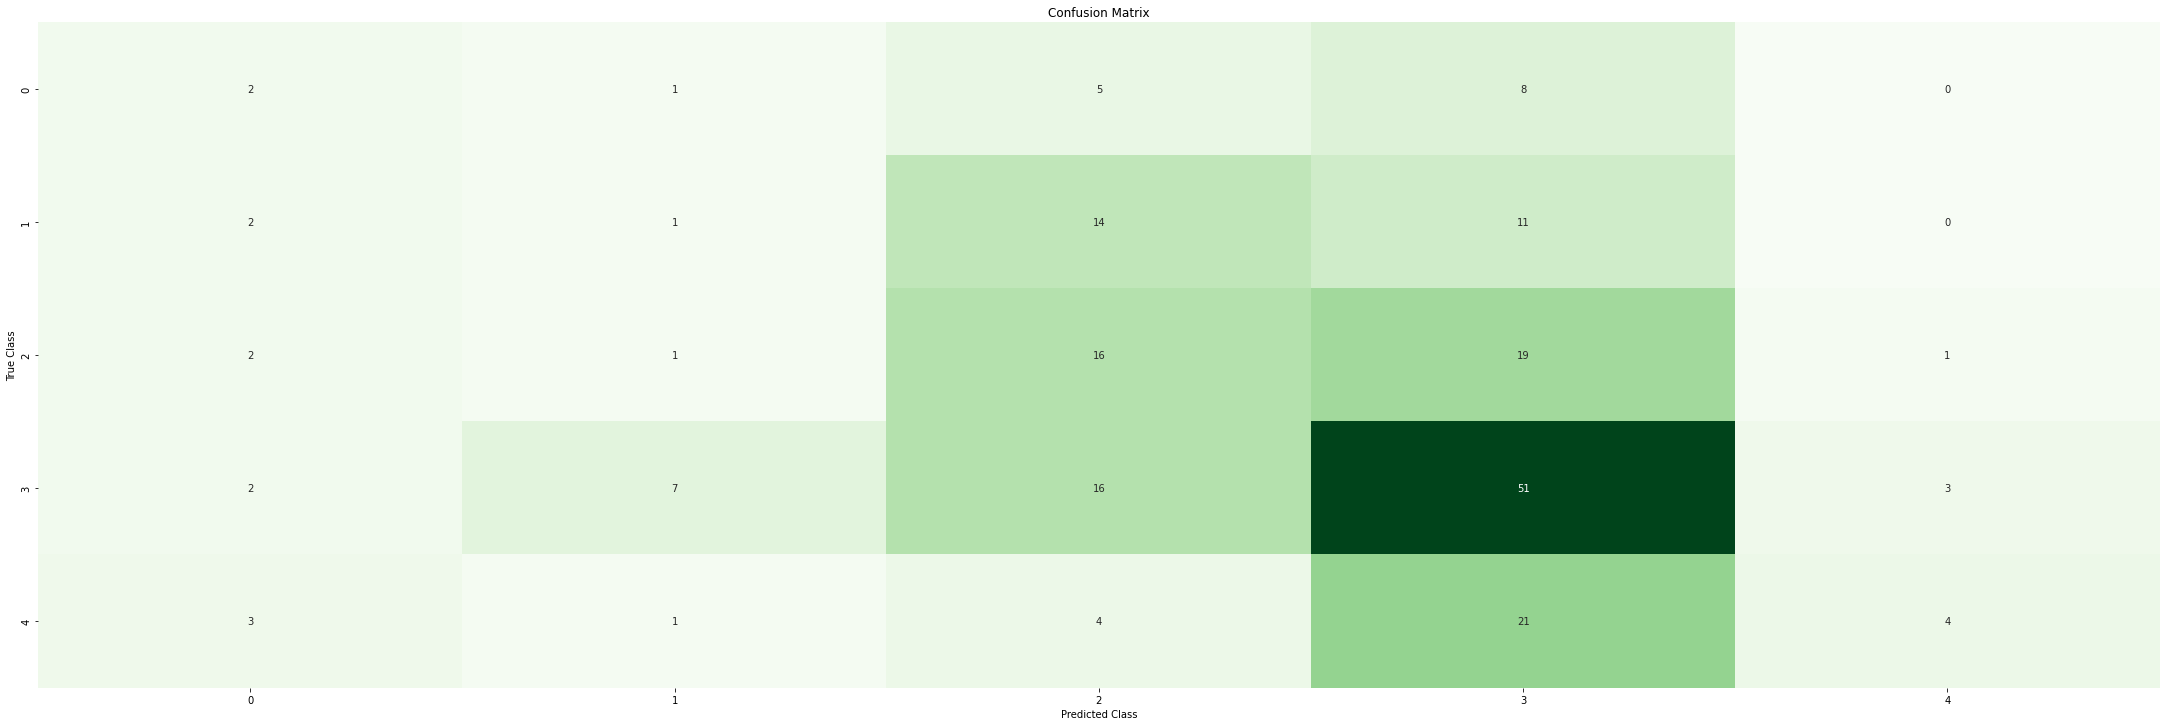


Classification report:

              precision    recall  f1-score   support

           0       0.18      0.12      0.15        16
           1       0.09      0.04      0.05        28
           2       0.29      0.41      0.34        39
           3       0.46      0.65      0.54        79
           4       0.50      0.12      0.20        33

    accuracy                           0.38       195
   macro avg       0.31      0.27      0.25       195
weighted avg       0.36      0.38      0.34       195

Logistic regression balanced
Accuracy:  27.18


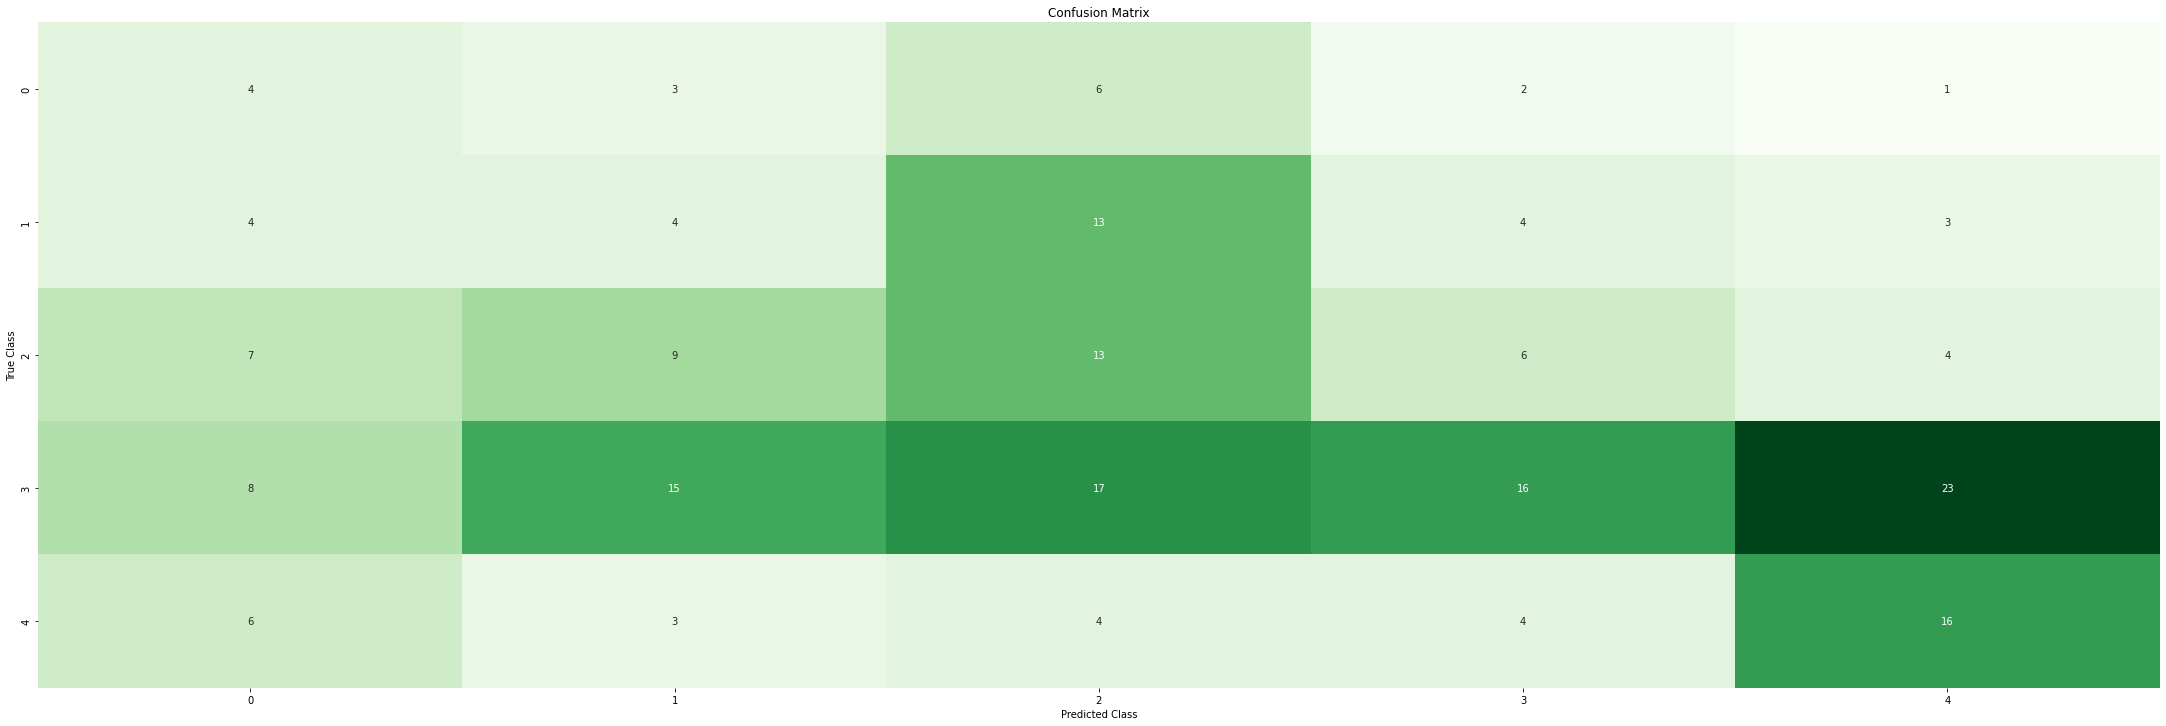


Classification report:

              precision    recall  f1-score   support

           0       0.14      0.25      0.18        16
           1       0.12      0.14      0.13        28
           2       0.25      0.33      0.28        39
           3       0.50      0.20      0.29        79
           4       0.34      0.48      0.40        33

    accuracy                           0.27       195
   macro avg       0.27      0.28      0.26       195
weighted avg       0.34      0.27      0.27       195

Ada boost classifier
Accuracy:  31.79


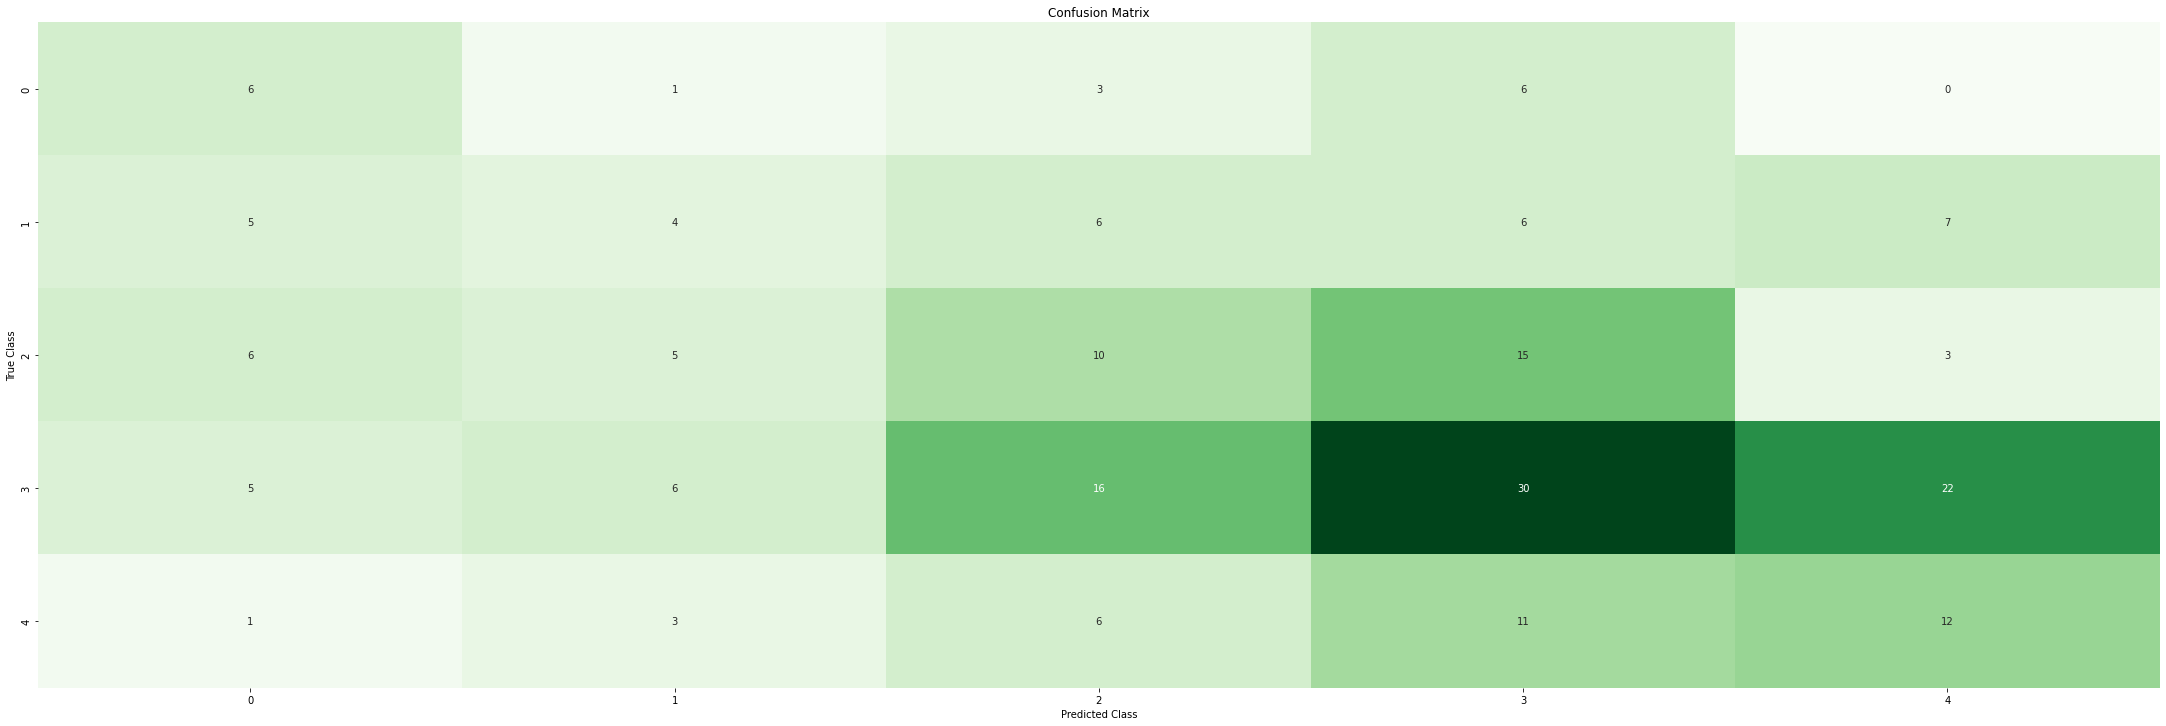


Classification report:

              precision    recall  f1-score   support

           0       0.26      0.38      0.31        16
           1       0.21      0.14      0.17        28
           2       0.24      0.26      0.25        39
           3       0.44      0.38      0.41        79
           4       0.27      0.36      0.31        33

    accuracy                           0.32       195
   macro avg       0.29      0.30      0.29       195
weighted avg       0.33      0.32      0.32       195

Support vector machine rbf
Accuracy:  43.08


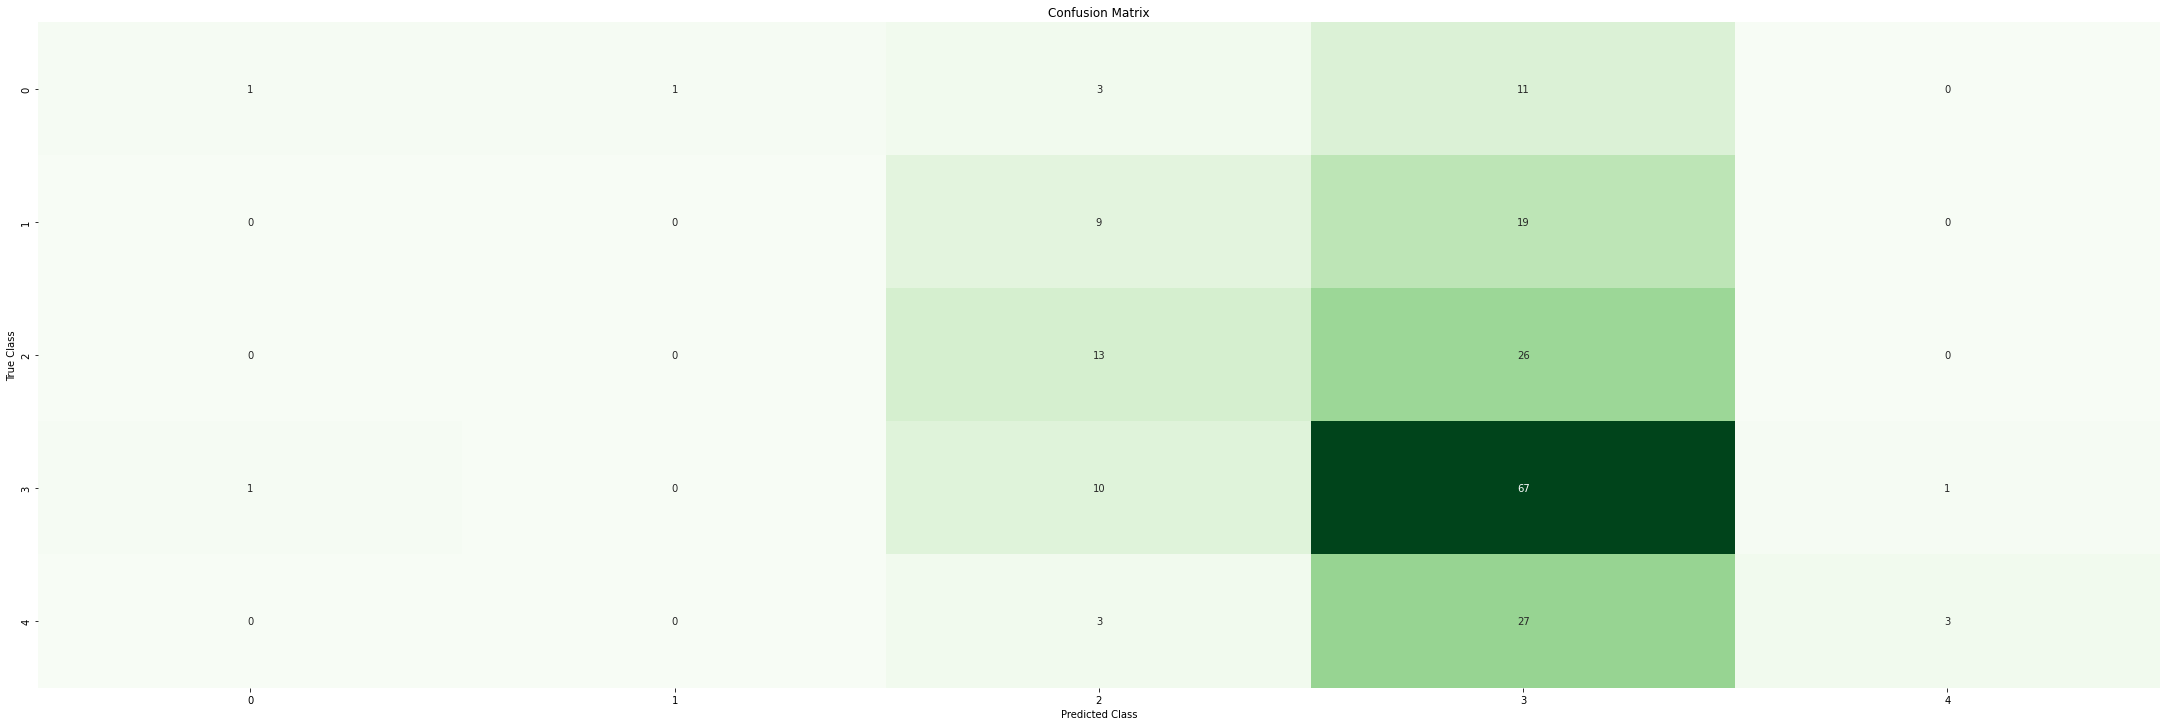


Classification report:

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.00      0.00      0.00        28
           2       0.34      0.33      0.34        39
           3       0.45      0.85      0.59        79
           4       0.75      0.09      0.16        33

    accuracy                           0.43       195
   macro avg       0.41      0.27      0.24       195
weighted avg       0.42      0.43      0.34       195

Random forest
Accuracy:  44.10


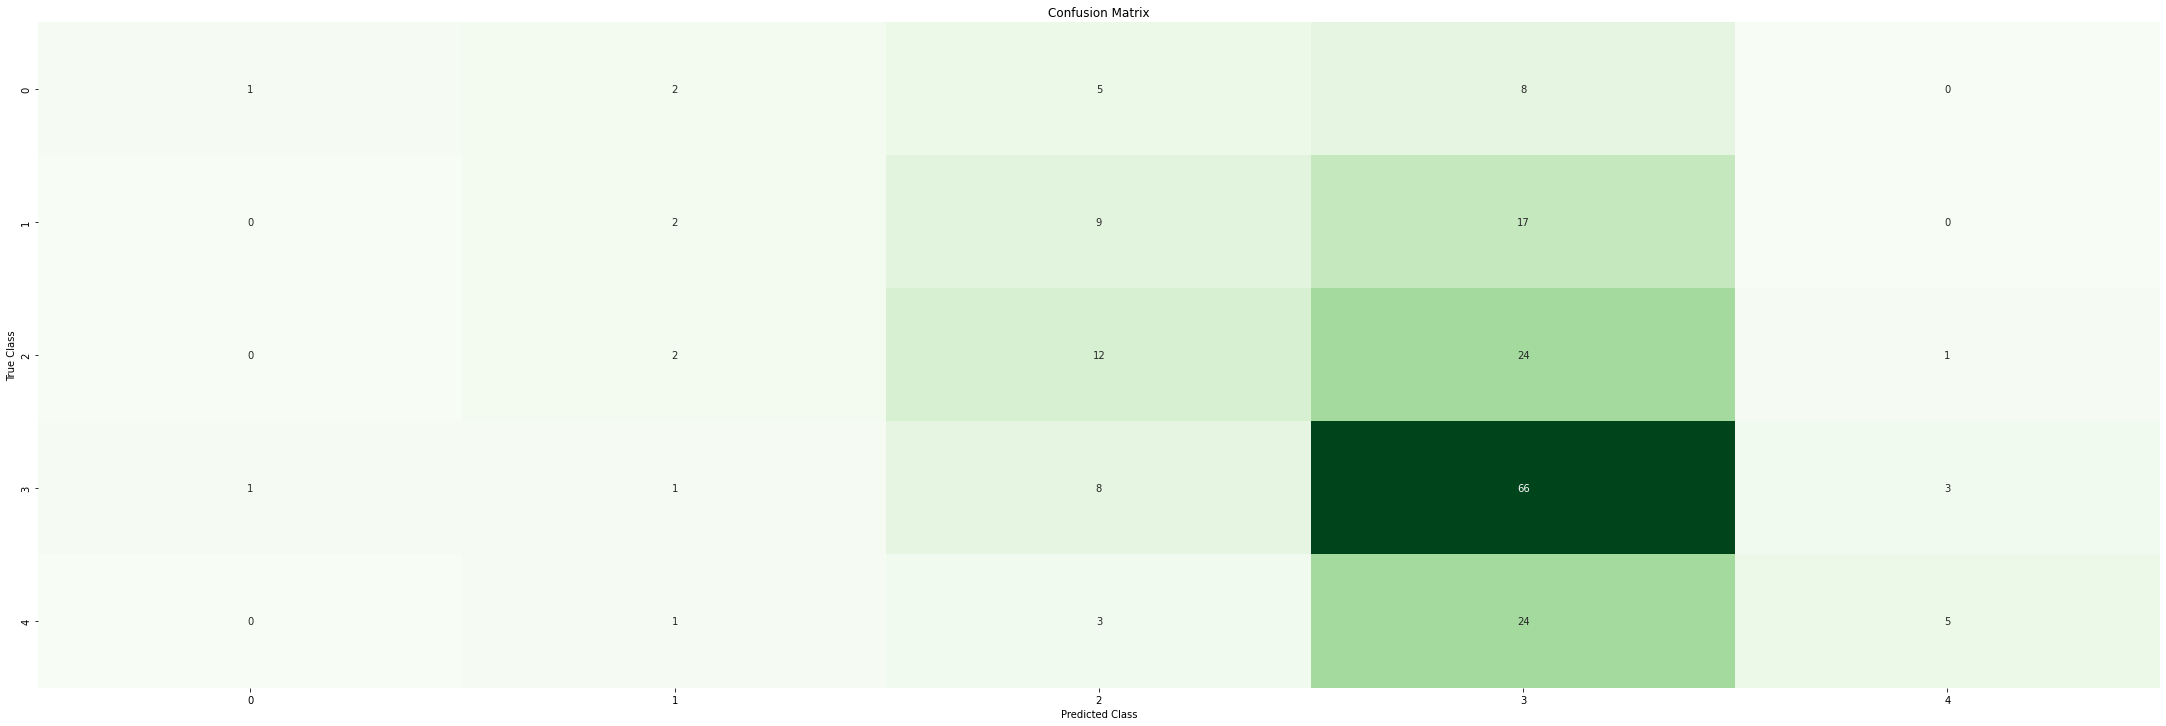


Classification report:

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.25      0.07      0.11        28
           2       0.32      0.31      0.32        39
           3       0.47      0.84      0.61        79
           4       0.56      0.15      0.24        33

    accuracy                           0.44       195
   macro avg       0.42      0.29      0.28       195
weighted avg       0.43      0.44      0.37       195



In [56]:
logistic_regression_reduced_ovr = LogisticRegression(random_state=0, multi_class="ovr")
model = logistic_regression_reduced_ovr.fit(X_train_reduced, y_train_reduced)
y_pred_reduced=logistic_regression_reduced_ovr.predict(X_test_reduced)
print("Logistic regression one-vs-rest")
accuracy_LR_reduced_ovr = get_prediction_report(y_test_reduced, y_pred_reduced)

logistic_regression_reduced_multi = LogisticRegression(random_state=0, multi_class="multinomial")
model = logistic_regression_reduced_multi.fit(X_train_reduced, y_train_reduced)
y_pred_reduced=logistic_regression_reduced_multi.predict(X_test_reduced)
print("Logistic regression multinominal")
accuracy_LR_ovr_multi_reduced = get_prediction_report(y_test_reduced, y_pred_reduced)

logistic_regression_reduced_bal = LogisticRegression(random_state=0, class_weight='balanced')
model = logistic_regression_reduced_bal.fit(X_train_reduced, y_train_reduced)
y_pred_reduced=logistic_regression_reduced_bal.predict(X_test_reduced)
print("Logistic regression balanced")
accuracy_LR_ovr_bal_red = get_prediction_report(y_test_reduced, y_pred_reduced)

abc_red = AdaBoostClassifier(n_estimators=100)
model = abc_red.fit(X_train_reduced, y_train_reduced)
y_pred_reduced=abc_red.predict(X_test_reduced)
print("Ada boost classifier")
accuracy_boost_reduced = get_prediction_report(y_test_reduced, y_pred_reduced)

svc_rbf_red= SVC(kernel='rbf',random_state=0)
svc_rbf_red.fit(X_train_reduced, y_train_reduced)
y_pred_reduced=svc_rbf_red.predict(X_test_reduced)
print("Support vector machine rbf")
accuracy_svcRBF_red = get_prediction_report(y_test_reduced, y_pred_reduced)

radnom_forest = RandomForestClassifier()
radnom_forest.fit(X_train_reduced, y_train_reduced)
y_pred_reduced=radnom_forest.predict(X_test_reduced)
print("Random forest")
accuracy_RFC_red = get_prediction_report(y_test_reduced, y_pred_reduced)

**Nijedan klasifikator nije dao zadovojavajuće rezultate.
Tačnost nijednog klasifikatora nije veća od 50%, dok preciznost, kompletnost i f1-mera za pojedine klase u nekim slučajevima
jesu veće od 50%.**